## Logistic Regression to Determine Customer Satisfaction

An airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. In this activity, we will construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. The goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data. 

Steps:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a binomial logistic regression model 
* Evaluating a binomial logistic regression model using a confusion matrix

In [1]:
# Standard operational package imports.
import pandas as pd
import numpy as np

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sklearn

# Visualization package imports.
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_original = pd.read_csv("Invistico_Airline.csv")
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Data Exploration

In [3]:
df_original.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [4]:
df = df_original.rename(columns={'Customer Type':'Customer_Type','Flight Distance':'Flight_Distance',
                                'Seat comfort':'Seat_comfort','Departure/Arrival time convenient':'convenient_deparr_time',
                                'Food and drink':'Food_and_drink','Gate location':'Gate_location',
                                'Inflight wifi service':'Inflight_wifi_service','Inflight entertainment':'Inflight_entertainment',
                                'Online support':'Online_support','Ease of Online booking':'Online_booking_ease',
                                'On-board service':'Onboard_service','Leg room service':'Leg_room_service',
                                'Baggage handling':'Baggage_handling','Checkin service':'Checkin_service',
                                'Online boarding':'Online_boarding','Departure Delay in Minutes':'Departure_Delay',
                                'Arrival Delay in Minutes':'Arrival_Delay','Type of Travel':'Type_Travel'})
df.columns

Index(['satisfaction', 'Customer_Type', 'Age', 'Type_Travel', 'Class',
       'Flight_Distance', 'Seat_comfort', 'convenient_deparr_time',
       'Food_and_drink', 'Gate_location', 'Inflight_wifi_service',
       'Inflight_entertainment', 'Online_support', 'Online_booking_ease',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Departure_Delay',
       'Arrival_Delay'],
      dtype='object')

In [5]:
df.isna().sum()

satisfaction                0
Customer_Type               0
Age                         0
Type_Travel                 0
Class                       0
Flight_Distance             0
Seat_comfort                0
convenient_deparr_time      0
Food_and_drink              0
Gate_location               0
Inflight_wifi_service       0
Inflight_entertainment      0
Online_support              0
Online_booking_ease         0
Onboard_service             0
Leg_room_service            0
Baggage_handling            0
Checkin_service             0
Cleanliness                 0
Online_boarding             0
Departure_Delay             0
Arrival_Delay             393
dtype: int64

In [6]:
df['satisfaction'].value_counts()

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

There were 71,087 satisfied customers and 58,793 dissatisfied customers. 54.7 percent (71,087/129,880) of customers were satisfied. While this is a simple calculation, this value can be compared to a logistic regression model's accuracy. The dataset is not highly imbalanced and hence the output will not be biased.

Since the airline is specifically interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. The Arrival Delay in Minutes column won't be included in the binomial logistic regression model; however, the airline might become interested in this column in the future. For now, we can leave these values as they are since the the other variable values for the corresponding rows are relevant.

In [7]:
df.dtypes

satisfaction               object
Customer_Type              object
Age                         int64
Type_Travel                object
Class                      object
Flight_Distance             int64
Seat_comfort                int64
convenient_deparr_time      int64
Food_and_drink              int64
Gate_location               int64
Inflight_wifi_service       int64
Inflight_entertainment      int64
Online_support              int64
Online_booking_ease         int64
Onboard_service             int64
Leg_room_service            int64
Baggage_handling            int64
Checkin_service             int64
Cleanliness                 int64
Online_boarding             int64
Departure_Delay             int64
Arrival_Delay             float64
dtype: object

In [8]:
df = df.astype({'Inflight_entertainment':float})
df.dtypes

satisfaction               object
Customer_Type              object
Age                         int64
Type_Travel                object
Class                      object
Flight_Distance             int64
Seat_comfort                int64
convenient_deparr_time      int64
Food_and_drink              int64
Gate_location               int64
Inflight_wifi_service       int64
Inflight_entertainment    float64
Online_support              int64
Online_booking_ease         int64
Onboard_service             int64
Leg_room_service            int64
Baggage_handling            int64
Checkin_service             int64
Cleanliness                 int64
Online_boarding             int64
Departure_Delay             int64
Arrival_Delay             float64
dtype: object

### Convert the categorical column `satisfaction` into numeric

Convert the categorical column `satisfaction` into numeric through one-hot encoding.

In [9]:
df['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df[['satisfaction']]).toarray()
df['satisfaction']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
129875    1.0
129876    0.0
129877    0.0
129878    0.0
129879    0.0
Name: satisfaction, Length: 129880, dtype: float64

In [10]:
df.head(10)

,satisfaction,Customer_Type,Age,Type_Travel,Class,Flight_Distance,Seat_comfort,convenient_deparr_time,Food_and_drink,Gate_location,...,Online_support,Online_booking_ease,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay,Arrival_Delay
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Model Building

In [11]:
x = df[['Inflight_entertainment']]
y = df['satisfaction']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)
clf = LogisticRegression().fit(xtrain, ytrain)

In [12]:
clf.coef_

array([[1.00724567]])

In [13]:
clf.intercept_

array([-3.23515113])

<Axes: xlabel='Inflight_entertainment', ylabel='satisfaction'>

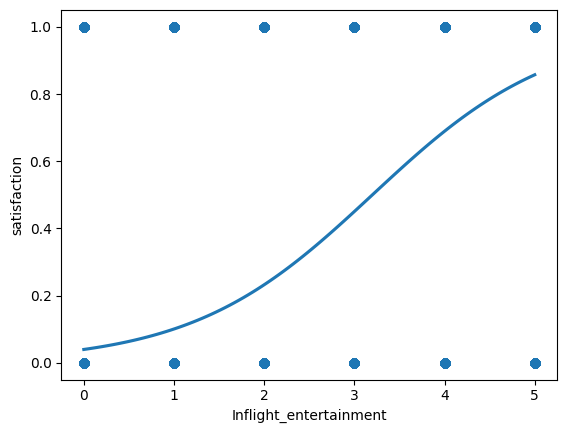

In [14]:
sns.regplot(x='Inflight_entertainment', y='satisfaction', data=df, logistic=True, ci=None)

The graph seems to indicate that the higher the inflight entertainment value, the higher the customer satisfaction, though this is currently not the most informative plot. The graph currently doesn't provide much insight into the data points, as Inflight entertainment is categorical.

### Results and evaluation

In [15]:
y_pred = clf.predict(xtest)
clf.predict_proba(xtest)

array([[0.31134655, 0.68865345],
       [0.90272759, 0.09727241],
       [0.14171998, 0.85828002],
       ...,
       [0.77217964, 0.22782036],
       [0.55315194, 0.44684806],
       [0.31134655, 0.68865345]])

In [16]:
clf.predict(xtest)

array([1., 0., 1., ..., 0., 0., 1.])

In [17]:
import sklearn.metrics as metrics
print("Accuracy:", "%.6f" % metrics.accuracy_score(ytest,y_pred))
print("Precision:", "%.6f" % metrics.precision_score(ytest, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(ytest, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(ytest, y_pred))

Accuracy: 0.801150
Precision: 0.818165
Recall: 0.820458
F1 Score: 0.819310


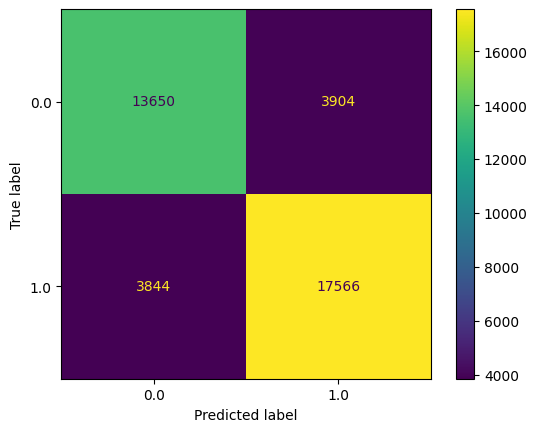

In [18]:
cm = metrics.confusion_matrix(ytest, y_pred, labels=clf.classes_)
dis = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
dis.plot()

Two of the quadrants are under 4,000, which are relatively low numbers. Based on what we know from the data and interpreting the matrix, it's clear that these numbers relate to false positives and false negatives.

Additionally, the other two quadrants—the true positives and true negatives—are both high numbers above 13,000.

There isn't a large difference in the number of false positives and false negatives. Nothe that, using more than a single independent variable in the model training process could improve model performance. This is because other variables, like Departure Delay in Minutes, seem like they could potentially influence customer satisfaction.